# Timeseries

We have downloaded datasets from https://datahub.io/core/co2-ppm.

In [3]:
import pandas as pd

![metadata](../img/metadata.png "Field information")

In [4]:
mlo = pd.read_csv('../datasets/co2-mm-mlo.csv', na_values=-99.99, index_col='Date', parse_dates=True)

In [5]:
mlo.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


In [6]:
mlo.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='Date', length=727, freq=None)

In [7]:
import matplotlib
%matplotlib inline

<Axes: xlabel='Date'>

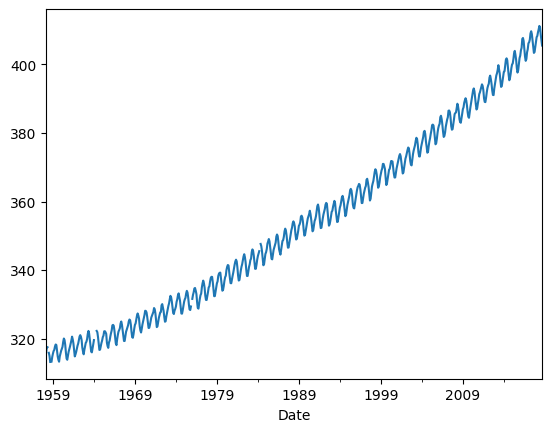

In [8]:
mlo['Average'].plot()

`mlo['Average']` is a timeseries: it a Series object with an index of dtype `datetime64` (from NumPy).

In [9]:
pd.date_range('2017-09-01', periods=5, freq='D')

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05'],
              dtype='datetime64[ns]', freq='D')

In [10]:
n_hours = 24
hour_index = pd.date_range('2017-09-01', periods=n_hours, freq='H')
hour_index

DatetimeIndex(['2017-09-01 00:00:00', '2017-09-01 01:00:00',
               '2017-09-01 02:00:00', '2017-09-01 03:00:00',
               '2017-09-01 04:00:00', '2017-09-01 05:00:00',
               '2017-09-01 06:00:00', '2017-09-01 07:00:00',
               '2017-09-01 08:00:00', '2017-09-01 09:00:00',
               '2017-09-01 10:00:00', '2017-09-01 11:00:00',
               '2017-09-01 12:00:00', '2017-09-01 13:00:00',
               '2017-09-01 14:00:00', '2017-09-01 15:00:00',
               '2017-09-01 16:00:00', '2017-09-01 17:00:00',
               '2017-09-01 18:00:00', '2017-09-01 19:00:00',
               '2017-09-01 20:00:00', '2017-09-01 21:00:00',
               '2017-09-01 22:00:00', '2017-09-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [11]:
import numpy as np

<Axes: >

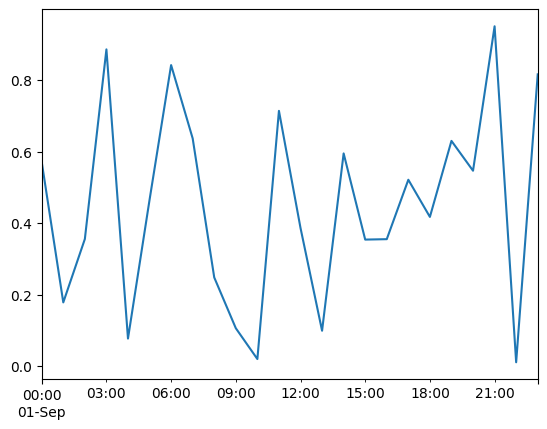

In [12]:
pd.Series(np.random.rand(n_hours), index=hour_index).plot()

## Rolling window operations

We may want to smooth out seasonal fluctuations by computing a rolling (or moving) average.

In [13]:
mlo['Interpolated'].notnull().value_counts()

True    727
Name: Interpolated, dtype: int64

In [14]:
s = mlo['Interpolated']

<Axes: xlabel='Date'>

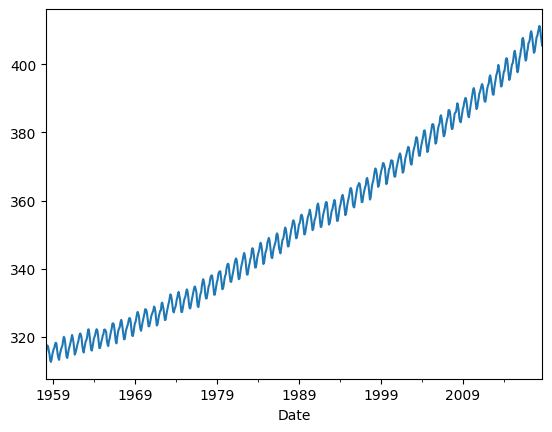

In [15]:
s.plot()

Let us select only the first two years of the `s` timeseries. Note that string indexing works.

<Axes: xlabel='Date'>

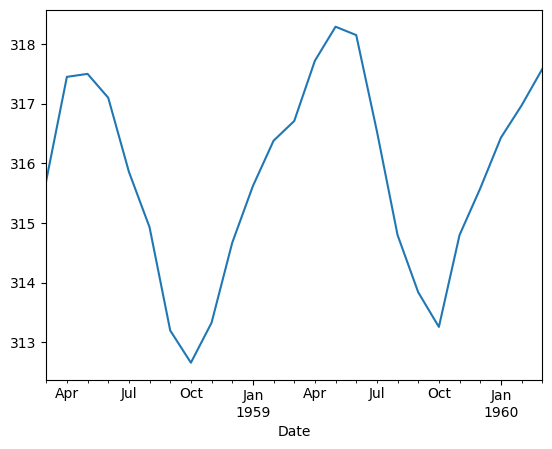

In [16]:
s[:'1960-03-01'].plot()

Even partial string indexing works!

<Axes: xlabel='Date'>

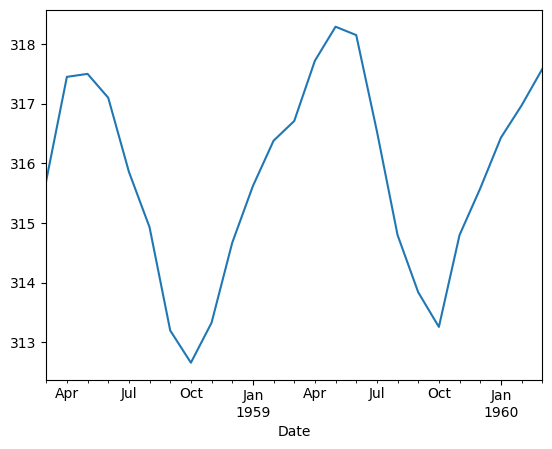

In [17]:
s[:'1960-03'].plot()

In [18]:
s[:'1960-01'].rolling(12).mean()

Date
1958-03-01           NaN
1958-04-01           NaN
1958-05-01           NaN
1958-06-01           NaN
1958-07-01           NaN
1958-08-01           NaN
1958-09-01           NaN
1958-10-01           NaN
1958-11-01           NaN
1958-12-01           NaN
1959-01-01           NaN
1959-02-01    315.367500
1959-03-01    315.450833
1959-04-01    315.473333
1959-05-01    315.539167
1959-06-01    315.626667
1959-07-01    315.683333
1959-08-01    315.672500
1959-09-01    315.725833
1959-10-01    315.775833
1959-11-01    315.898333
1959-12-01    315.974167
1960-01-01    316.041667
Name: Interpolated, dtype: float64

<Axes: xlabel='Date'>

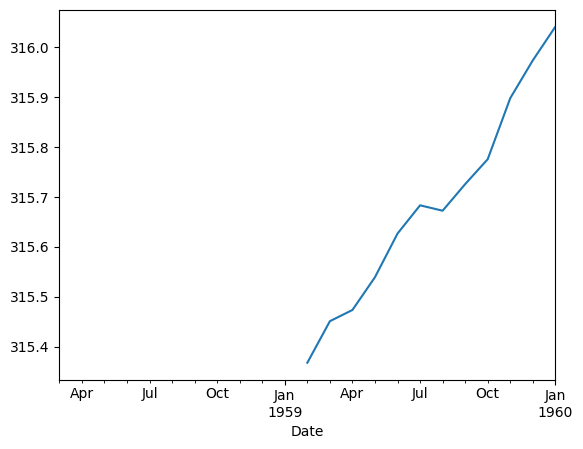

In [19]:
s[:'1960-01'].rolling(12).mean().plot()

<Axes: xlabel='Date'>

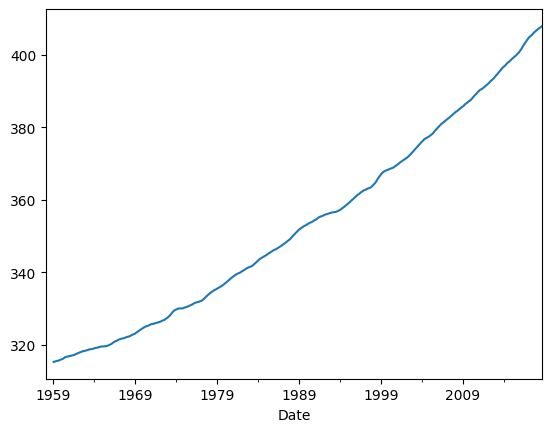

In [20]:
s.rolling(12).mean().plot()

Let us create a DataFrame which stores `mlo` plus this rolling average in a new column (labelled `smooth`).

In [21]:
df = mlo.assign(smooth=s.rolling(12).mean())

<Axes: xlabel='Date'>

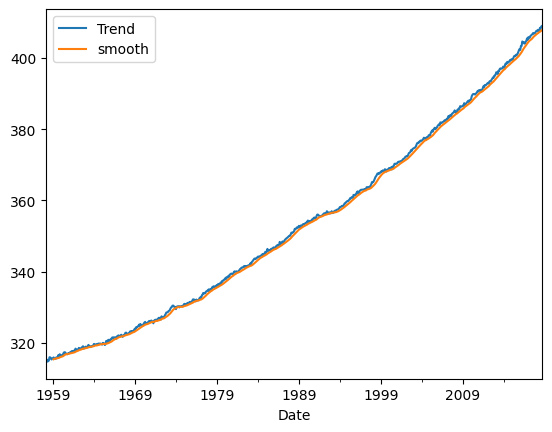

In [22]:
df[['Trend', 'smooth']].plot()

### Hands-on exercises

1. We can specify a window type when computing the rolling operation. What do you expect `s.rolling(12, win_type='triang').mean()` should yield?
2. Plot it to confirm (confront) your assumption. Plot the difference between the above and `mlo['Trend']`.

## The PeriodIndex object

Using `.rolling()` with a time-based index is similar to resampling; `.rolling()` is a time-based window operation, while `.resample()` is a frequency-based window operation.

In [23]:
s.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='Date', length=727, freq=None)

In [24]:
s['1958-03':'1958-06']

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
Name: Interpolated, dtype: float64

Notice that each value is associated with a point in time (most usual type of timeseries data), but really it should be associated with a time interval (value holds for the entire month). Pandas provide a `Period` object, opposite the expected `Timestamp` object.

In [25]:
pd.Timestamp('1958-03-01')

Timestamp('1958-03-01 00:00:00')

In [26]:
pd.Period('1958-03-01', freq='M')

Period('1958-03', 'M')

In [27]:
monthly_index = pd.period_range('1958-03-01', periods=727, freq='M')
monthly_index

PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09'],
            dtype='period[M]', length=727)

In [29]:
s.index


PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09'],
            dtype='period[M]', length=727)

In [28]:
s.index = monthly_index
s.index

PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09'],
            dtype='period[M]', length=727)

In [55]:
s['1958']

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
Freq: M, Name: Interpolated, dtype: float64

## Resampling

We can down-sample the timeseries (going to a lower frequency), if we are interested in the minimum value over 3-month bins (for a list of convenient aliases, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

In [56]:
s.head(15)

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
1959-01    315.62
1959-02    316.38
1959-03    316.71
1959-04    317.72
1959-05    318.29
Freq: M, Name: Interpolated, dtype: float64

In [58]:
s.index = s.index.astype('datetime64[ns]')

re = s.resample('3M').min()
re.head()

1958-03-31    315.71
1958-06-30    317.10
1958-09-30    313.20
1958-12-31    312.66
1959-03-31    315.62
Freq: 3M, Name: Interpolated, dtype: float64

If we wanted to compute the difference between `re` values and `mlo['Trend']` values, we would have to begin with up-sampling `re`.

In [59]:
up = re.resample('M').asfreq()
up.head(10)

1958-03-31    315.71
1958-04-30       NaN
1958-05-31       NaN
1958-06-30    317.10
1958-07-31       NaN
1958-08-31       NaN
1958-09-30    313.20
1958-10-31       NaN
1958-11-30       NaN
1958-12-31    312.66
Freq: M, Name: Interpolated, dtype: float64

### Hands-on exercises

3. How long is `re`? (We mean the number of elements, not the duration in time!)
4. How would you go about computing the (relative) difference between `up` and `mlo['Trend']`?